In [2]:
# Reimportar librerías y volver a cargar el archivo tras el reinicio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


# Conjunto original

In [4]:
# Importar función de análisis exploratorio
import sys
sys.path.append('../src')
from eda_utils import analizar_estructura_dataset

# Cargar dataset original
df = pd.read_csv('../data/processed/df_objetivo/original.csv', sep=';')

# Realizar análisis completo
resultados_original = analizar_estructura_dataset(
    df=df, 
    nombre_dataset="Dataset Original de Estudiantes",
    mostrar_jerarquia=True
)

📊 ANÁLISIS DE ESTRUCTURA DEL DATASET ORIGINAL DE ESTUDIANTES

🔢 1. DIMENSIONALIDAD
------------------------------
Número de filas (registros): 1,445
Número de columnas (variables): 52
Total de celdas: 75,140

Tamaño en memoria: 3101.96 KB

📝 2. ANÁLISIS DE TIPOS DE VARIABLES
----------------------------------------
🔢 Variables Numéricas (11):
   • CONVENIO_PLAN
   • AVANCE_CARRERA
   • EDAD
   • NUMERO_MATRICULAS
   • PAPA
   • PROME_ACADE
   • PBM_CALCULADO
   • ESTRATO
   • TELEFONO2
   • CARNET_UN
   • PUNTAJE_ADMISION

📂 Variables Categóricas (18):
   • SEDE (1 categorías únicas)
   • FACULTAD (1 categorías únicas)
   • PLAN (6 categorías únicas)
   • NIVEL (1 categorías únicas)
   • SUBACCESO (5 categorías únicas)
   • CONVOCATORIA (12 categorías únicas)
   • APERTURA (12 categorías únicas)
   • DEPTO_RESIDENCIA (5 categorías únicas)
   • MUNICIPIO_RESIDENCIA (28 categorías únicas)
   • PROVINCIA_NACIMIENTO (20 categorías únicas)
   • MUNICIPIO_NACIMIENTO (94 categorías únicas)
  

# Conjunto despues de eliminar columnas

In [5]:
# Cargar dataset después de eliminar columnas
df_procesado = pd.read_excel('../data/processed/df_objetivo/df_objetivo_riesgo_real.xlsx')

# Realizar análisis completo del dataset procesado
resultados_procesado = analizar_estructura_dataset(
    df=df_procesado, 
    nombre_dataset="Dataset Después de Eliminar Columnas",
    mostrar_jerarquia=True
)

# Comparar ambos datasets
from eda_utils import comparar_datasets
comparar_datasets(df, df_procesado, "Dataset Original", "Dataset Procesado")

📊 ANÁLISIS DE ESTRUCTURA DEL DATASET DESPUÉS DE ELIMINAR COLUMNAS

🔢 1. DIMENSIONALIDAD
------------------------------
Número de filas (registros): 1,283
Número de columnas (variables): 25
Total de celdas: 32,075

Tamaño en memoria: 1438.98 KB

📝 2. ANÁLISIS DE TIPOS DE VARIABLES
----------------------------------------
🔢 Variables Numéricas (10):
   • AVANCE_CARRERA
   • EDAD
   • NUMERO_MATRICULAS
   • PAPA
   • PROME_ACADE
   • PBM_CALCULADO
   • ESTRATO
   • PUNTAJE_ADMISION
   • AVANCE_ESPERADO
   • ATRASO_PORCENTUAL

📂 Variables Categóricas (10):
   • SEDE (1 categorías únicas)
   • PLAN (6 categorías únicas)
   • SUBACCESO (5 categorías únicas)
   • APERTURA (11 categorías únicas)
   • MUNICIPIO_RESIDENCIA (22 categorías únicas)
   • MUNICIPIO_NACIMIENTO (90 categorías únicas)
   • DISCAPACIDAD (6 categorías únicas)
   • CARACTER_COLEGIO (3 categorías únicas)
   • MUNICIPIO_RESIDENCIA_FAM (47 categorías únicas)
   • NODO_INICIO (6 categorías únicas)

⚡ Variables Binarias (4):
  

## Estadísticos descriptivos

### Dataset imputado

In [7]:
# Cargar el nuevo dataset imputado
df_imputado = pd.read_excel("../data/processed/df_objetivo/df_objetivo_imputado.xlsx")

# Calcular estadísticos descriptivos básicos para variables numéricas
estadisticas_numericas = df_imputado.describe().T

# Calcular medidas adicionales: rango e IQR
estadisticas_numericas["rango"] = estadisticas_numericas["max"] - estadisticas_numericas["min"]
estadisticas_numericas["IQR"] = estadisticas_numericas["75%"] - estadisticas_numericas["25%"]

estadisticas_numericas.sort_index().round(2)


,count,mean,std,min,25%,50%,75%,max,rango,IQR
ATRASO_PORCENTUAL,1283.0,12.12,9.80,0.00,5.70,11.00,16.00,56.00,56.00,10.30
AVANCE_CARRERA,1283.0,38.88,27.46,0.00,15.45,36.00,62.10,96.00,96.00,46.65
AVANCE_ESPERADO,1283.0,50.14,24.56,8.00,32.00,48.00,72.00,88.00,80.00,40.00
EDAD,1283.0,21.40,2.95,16.00,19.00,21.00,23.00,43.00,27.00,4.00
ESTRATO,1283.0,1.41,0.86,0.00,1.00,1.00,2.00,7.00,7.00,1.00
NUMERO_MATRICULAS,1283.0,6.27,3.07,1.00,4.00,6.00,9.00,11.00,10.00,5.00
PAPA,1283.0,3.95,0.35,2.10,3.80,4.00,4.20,4.80,2.70,0.40
PBM_CALCULADO,1283.0,9.29,11.30,1.00,2.00,5.00,11.00,64.00,63.00,9.00
PUNTAJE_ADMISION,1283.0,476.80,77.37,244.92,429.70,473.55,529.57,888.48,643.56,99.87
RIESGO_DESERCION,1283.0,0.15,0.35,0.00,0.00,0.00,0.00,1.00,1.00,0.00


******

### Matriz de correlación de Pearson

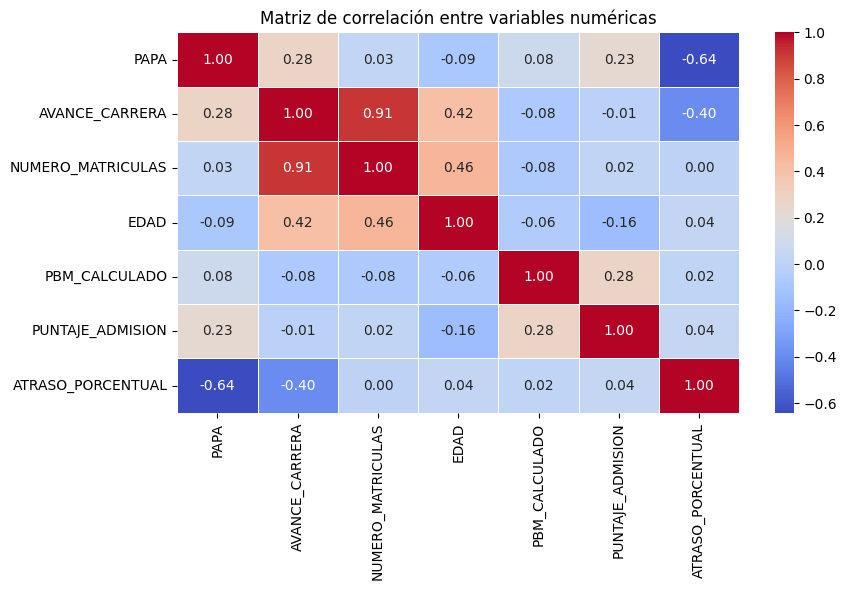

In [8]:
# Variables numéricas para la matriz de correlación
variables_correlacion = [
    "PAPA", "AVANCE_CARRERA", "NUMERO_MATRICULAS", "EDAD",
    "PBM_CALCULADO", "PUNTAJE_ADMISION", "ATRASO_PORCENTUAL"
]

# Calcular matriz de correlación
matriz_correlacion = df_imputado[variables_correlacion].corr()

# Graficar la matriz
plt.figure(figsize=(9, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


In [9]:
df = df_imputado.copy()

# Lista de variables categóricas a analizar
variables_categoricas = [
    "GENERO", "DISCAPACIDAD", "VICTIMAS_DEL_CONFLICTO",
    "SUBACCESO", "NODO_INICIO", "CARACTER_COLEGIO"
]

# Crear diccionario para guardar resultados
resumen_categoricas = {}

# Calcular estadísticas para cada variable categórica
for var in variables_categoricas:
    print(f"\n=== {var} ===")
    
    # Moda
    moda = df[var].mode()[0] if not df[var].mode().empty else None
    print(f"Moda: {moda}")
    
    # Cardinalidad
    cardinalidad = df[var].nunique(dropna=False)
    print(f"Cardinalidad: {cardinalidad}")
    
    # Frecuencia absoluta
    print("Frecuencia absoluta:")
    print(df[var].value_counts(dropna=False))
    
    # Frecuencia relativa
    print("Frecuencia relativa (%):")
    print((df[var].value_counts(normalize=True, dropna=False) * 100).round(2))



=== GENERO ===
Moda: HOMBRE
Cardinalidad: 2
Frecuencia absoluta:
HOMBRE    720
MUJER     563
Name: GENERO, dtype: int64
Frecuencia relativa (%):
HOMBRE    56.12
MUJER     43.88
Name: GENERO, dtype: float64

=== DISCAPACIDAD ===
Moda: NO
Cardinalidad: 6
Frecuencia absoluta:
NO             1276
AUDITIVA          2
VISUAL            2
FISICA            1
MÚLTIPLE          1
PSICOSOCIAL       1
Name: DISCAPACIDAD, dtype: int64
Frecuencia relativa (%):
NO             99.45
AUDITIVA        0.16
VISUAL          0.16
FISICA          0.08
MÚLTIPLE        0.08
PSICOSOCIAL     0.08
Name: DISCAPACIDAD, dtype: float64

=== VICTIMAS_DEL_CONFLICTO ===
Moda: NO
Cardinalidad: 2
Frecuencia absoluta:
NO    1166
SI     117
Name: VICTIMAS_DEL_CONFLICTO, dtype: int64
Frecuencia relativa (%):
NO    90.88
SI     9.12
Name: VICTIMAS_DEL_CONFLICTO, dtype: float64

=== SUBACCESO ===
Moda: PROGRAMA DE ADMISIÓN ESPECIAL PARA LOS PROGRAMAS DE PREGRADO SEDE LA PAZ
Cardinalidad: 5
Frecuencia absoluta:
PROGRAMA DE AD

### Boxplot para visualizar los outliers

In [10]:
# Seleccionar variables numéricas relevantes
variables_numericas = [
    "PAPA", "AVANCE_CARRERA", "EDAD", "NUMERO_MATRICULAS",
    "PBM_CALCULADO", "AVANCE_ESPERADO", "ATRASO_PORCENTUAL"
]

# Calcular límites de outliers por IQR
outliers_info = {}
for col in variables_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_info[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "num_outliers": len(outliers),
        "percent_outliers": 100 * len(outliers) / len(df)
    }

outliers_info


{'PAPA': {'Q1': 3.8,
  'Q3': 4.2,
  'IQR': 0.40000000000000036,
  'lower_bound': 3.1999999999999993,
  'upper_bound': 4.800000000000001,
  'num_outliers': 28,
  'percent_outliers': 2.182385035074045},
 'AVANCE_CARRERA': {'Q1': 15.45,
  'Q3': 62.1,
  'IQR': 46.650000000000006,
  'lower_bound': -54.525000000000006,
  'upper_bound': 132.07500000000002,
  'num_outliers': 0,
  'percent_outliers': 0.0},
 'EDAD': {'Q1': 19.0,
  'Q3': 23.0,
  'IQR': 4.0,
  'lower_bound': 13.0,
  'upper_bound': 29.0,
  'num_outliers': 18,
  'percent_outliers': 1.4029618082618862},
 'NUMERO_MATRICULAS': {'Q1': 4.0,
  'Q3': 9.0,
  'IQR': 5.0,
  'lower_bound': -3.5,
  'upper_bound': 16.5,
  'num_outliers': 0,
  'percent_outliers': 0.0},
 'PBM_CALCULADO': {'Q1': 2.0,
  'Q3': 11.0,
  'IQR': 9.0,
  'lower_bound': -11.5,
  'upper_bound': 24.5,
  'num_outliers': 148,
  'percent_outliers': 11.535463756819953},
 'AVANCE_ESPERADO': {'Q1': 32.0,
  'Q3': 72.0,
  'IQR': 40.0,
  'lower_bound': -28.0,
  'upper_bound': 132.0,
 

| Variable               | Q1   | Q3   | IQR  | Outliers (%) | Comentario clave                                                          |
| ---------------------- | ---- | ---- | ---- | ------------ | ------------------------------------------------------------------------- |
| **PAPA**               | 3.8  | 4.2  | 0.4  | 2.16%        | Ligeros outliers por debajo de 3.2 y por encima de 4.8.                   |
| **AVANCE\_CARRERA**    | 15.5 | 62.1 | 46.6 | 0.00%        | No presenta outliers según IQR.                                           |
| **EDAD**               | 19.0 | 23.0 | 4.0  | 1.47%        | Estudiantes con más de 29 años (posibles rezagados o cambios de carrera). |
| **NUMERO\_MATRICULAS** | 4.0  | 9.0  | 5.0  | 0.00%        | Sin valores atípicos según IQR.                                           |
| **PBM\_CALCULADO**     | 2.0  | 11.0 | 9.0  | 11.51%       | ¡Alta proporción de outliers! Podría haber codificación no uniforme.      |
| **AVANCE\_ESPERADO**   | 32.0 | 72.0 | 40.0 | 0.00%        | Esperado, pues se deriva de `NUMERO_MATRICULAS * 8`.                      |
| **ATRASO\_PORCENTUAL** | 5.7  | 15.9 | 10.2 | 5.49%        | Algunos estudiantes tienen rezagos muy altos (> 31%).                     |


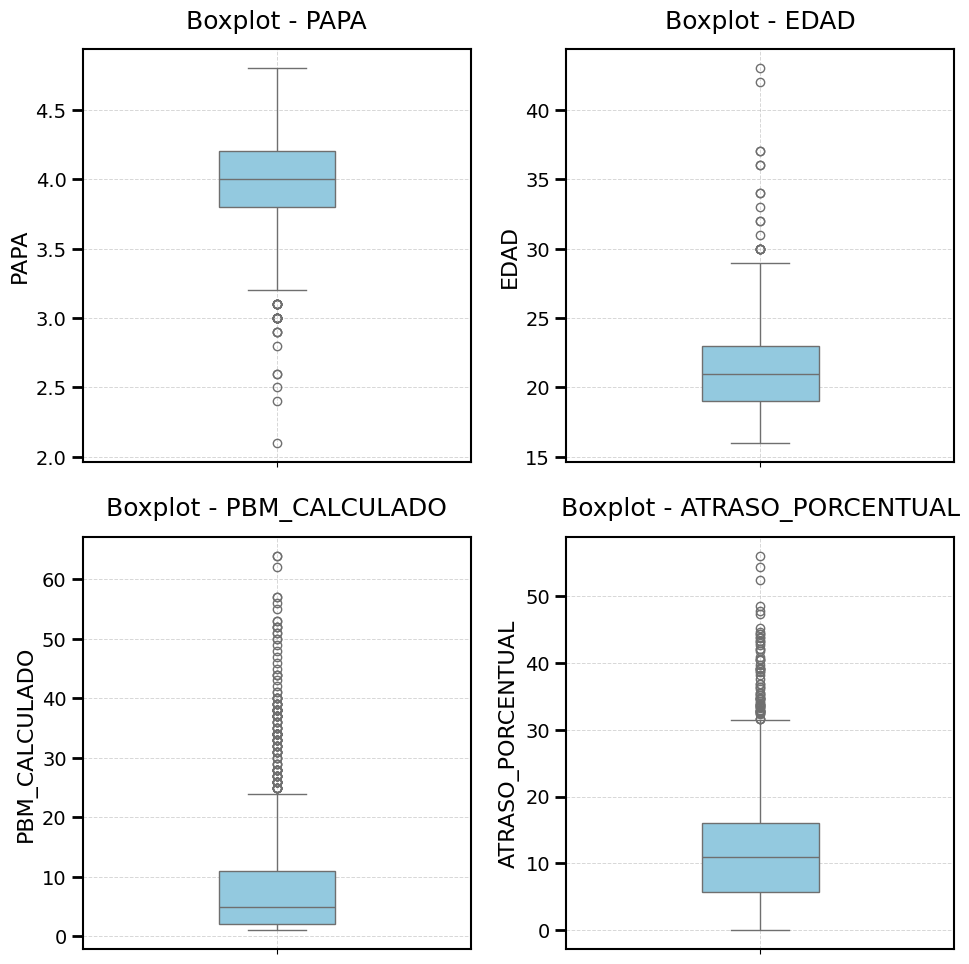

In [11]:
# Lista de variables numéricas relevantes
variables_numericas = [
    "PAPA", "EDAD",
    "PBM_CALCULADO", "ATRASO_PORCENTUAL"
]

# Crear grid de boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# Generar un boxplot por variable
for i, col in enumerate(variables_numericas):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue", width=0.3)  # Reduce ancho de la caja
    axes[i].set_title(f"Boxplot - {col}", fontsize=18, pad=15)  # Título grande
    axes[i].set_ylabel(col, fontsize=16)  # Eje Y grande
    axes[i].tick_params(axis='y', labelsize=14, width=2, length=8)  # Yticks grandes y visibles
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].grid(True, linestyle='--', linewidth=0.7, alpha=0.5)
    for spine in axes[i].spines.values():
        spine.set_linewidth(1.5)

# Eliminar gráficos vacíos si no se usan todos los subplots
for j in range(len(variables_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

* `PAPA` muestra algunos valores atípicos por encima de 4.8, aunque no parecen extremos (máx ≈ 5.0).

* `EDAD` presenta algunos casos > 29 años, posiblemente estudiantes con trayectorias no lineales (transfers, pausas).

* `PBM_CALCULADO` tiene valores significativamente altos que podrían deberse a codificaciones extensas de categorías (habría que revisar si es ordinal o un score).

* `ATRASO_PORCENTUAL` tiene una cola derecha prolongada, lo que indica a algunos estudiantes con alto rezago.

C:\Users\andre\AppData\Local\Temp\ipykernel_16240\3752811734.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_largo, x="Variable", y="Valor", palette="Set2", width=0.7, ax=ax2)


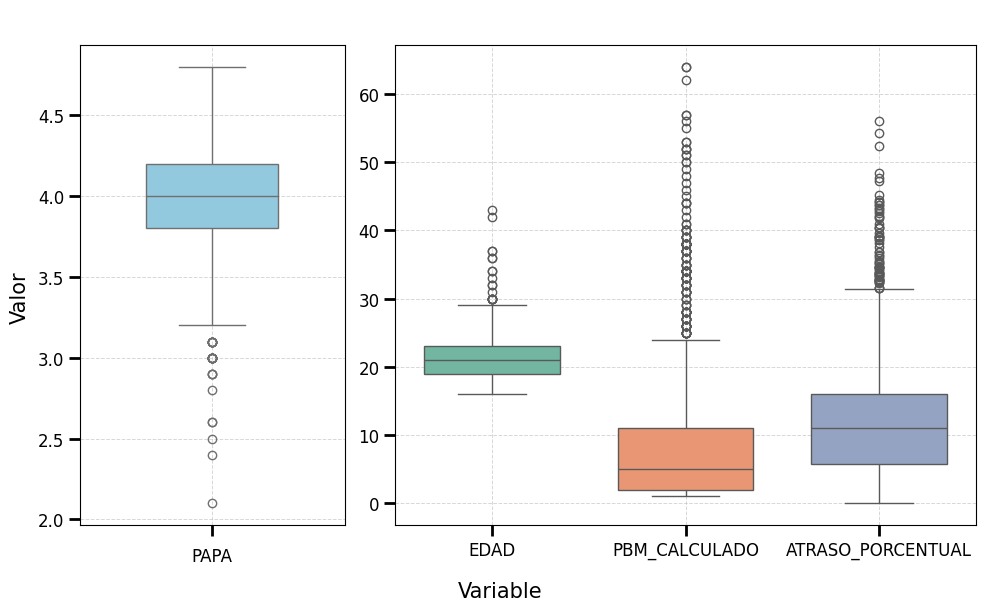

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Crear figura y GridSpec
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(1, 3, figure=fig)

# Título general centrado
fig.suptitle(" ", fontsize=17, y=0.98)

# Subplot 1: Boxplot de PAPA (ocupa 1 columna)
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(y=df["PAPA"], ax=ax1, color="skyblue", width=0.5)
ax1.set_ylabel("")  # Eliminar ylabel individual
ax1.set_xlabel("PAPA", fontsize=12)  # Etiqueta en x para PAPA
ax1.tick_params(axis='y', labelsize=12, width=2, length=8)
ax1.tick_params(axis='x', labelsize=12, width=2, length=8)
ax1.grid(True, linestyle="--", linewidth=0.7, alpha=0.5)

# Subplot 2: Boxplots combinados (ocupa 2 columnas)
ax2 = fig.add_subplot(gs[0, 1:])
variables_a_combinar = ["EDAD", "PBM_CALCULADO", "ATRASO_PORCENTUAL"]
df_largo = df[variables_a_combinar].melt(var_name="Variable", value_name="Valor")
sns.boxplot(data=df_largo, x="Variable", y="Valor", palette="Set2", width=0.7, ax=ax2)
ax2.set_ylabel("")  # Eliminar ylabel individual
ax2.set_xlabel("")  # Eliminar xlabel individual
ax2.tick_params(axis='y', labelsize=12, width=2, length=8)
ax2.tick_params(axis='x', labelsize=12, width=2, length=8)
ax2.grid(True, linestyle="--", linewidth=0.7, alpha=0.5)

# Ylabel centrado a la izquierda de ambos subplots
fig.text(0.02, 0.5, "Valor", rotation=90, ha="center", va="center", fontsize=15)

# Xlabel centrado sobre ambos subplots
fig.text(0.5, 0.0, "Variable", ha="center", fontsize=15)

# Ajustar diseño para dar espacio al título, ylabel y xlabel
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.12, left=0.08)
plt.show()

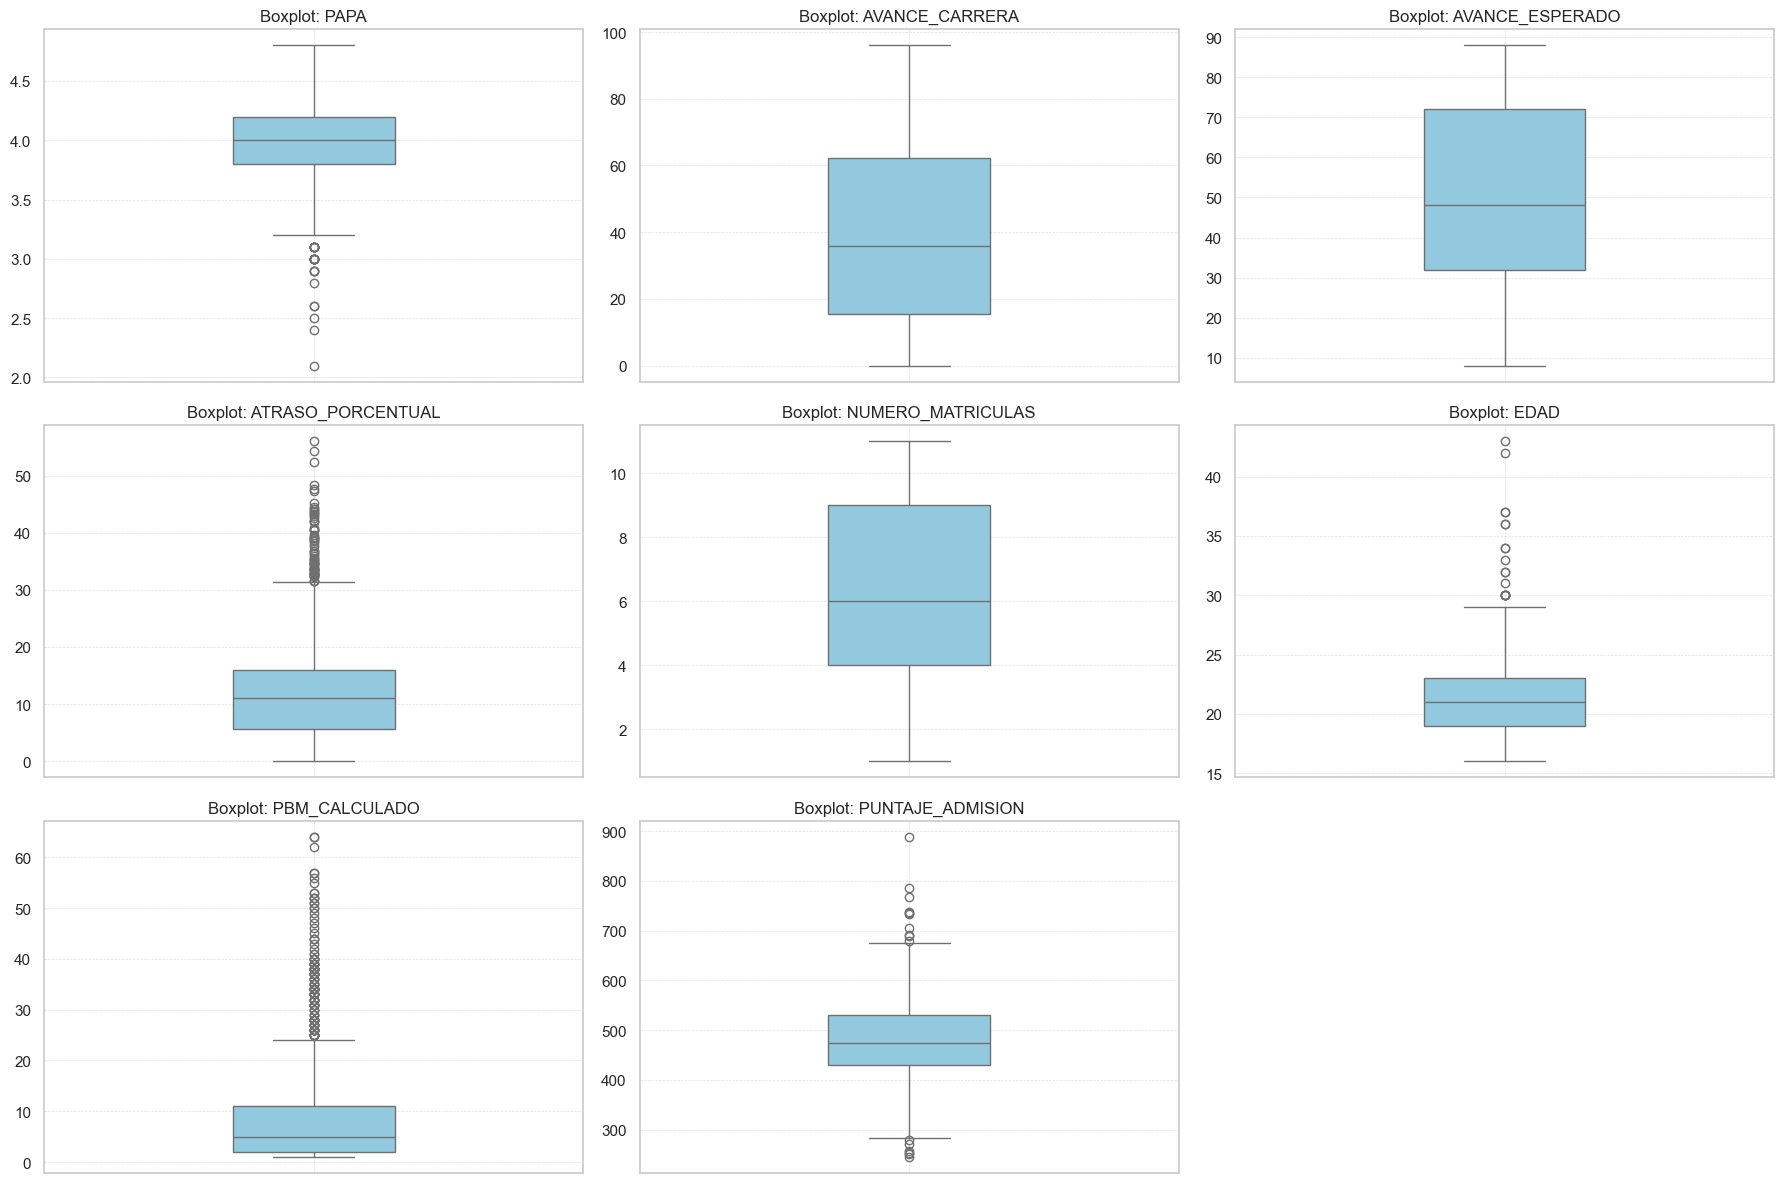

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas que deseas analizar
variables_numericas = [
    "PAPA", "AVANCE_CARRERA", "AVANCE_ESPERADO",
    "ATRASO_PORCENTUAL", "NUMERO_MATRICULAS", "EDAD",
    "PBM_CALCULADO", "PUNTAJE_ADMISION"
]

# Tamaño de la figura y estilo
sns.set(style="whitegrid", palette="Set2")
n_cols = 3
n_rows = -(-len(variables_numericas) // n_cols)  # Redondeo hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(y=df[var], ax=axes[i], color="skyblue", width=0.3)
    axes[i].set_title(f"Boxplot: {var}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Ocultar ejes vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
# Lista de variables numéricas
variables_numericas = [
    "PAPA", "AVANCE_CARRERA", "AVANCE_ESPERADO",
    "ATRASO_PORCENTUAL", "NUMERO_MATRICULAS", "EDAD",
    "PBM_CALCULADO", "PUNTAJE_ADMISION"
]

# Función para describir un boxplot numéricamente
def resumen_boxplot(serie):
    q1 = serie.quantile(0.25)
    q2 = serie.quantile(0.50)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    li = q1 - 1.5 * iqr
    ls = q3 + 1.5 * iqr
    outliers = ((serie < li) | (serie > ls)).sum()
    return {
        "Q1": round(q1, 2),
        "Mediana": round(q2, 2),
        "Q3": round(q3, 2),
        "IQR": round(iqr, 2),
        "Límite inferior": round(li, 2),
        "Límite superior": round(ls, 2),
        "Outliers": int(outliers)
    }

# Generar resumen para todas las variables
resumen_boxplots = {
    var: resumen_boxplot(df[var]) for var in variables_numericas
}

# Mostrar resultados ordenados
import pandas as pd
pd.DataFrame(resumen_boxplots).T


,Q1,Mediana,Q3,IQR,Límite inferior,Límite superior,Outliers
PAPA,3.80,4.00,4.20,0.40,3.20,4.80,28.0
AVANCE_CARRERA,15.45,36.00,62.10,46.65,-54.53,132.08,0.0
AVANCE_ESPERADO,32.00,48.00,72.00,40.00,-28.00,132.00,0.0
ATRASO_PORCENTUAL,5.70,11.00,16.00,10.30,-9.75,31.45,68.0
NUMERO_MATRICULAS,4.00,6.00,9.00,5.00,-3.50,16.50,0.0
EDAD,19.00,21.00,23.00,4.00,13.00,29.00,18.0
PBM_CALCULADO,2.00,5.00,11.00,9.00,-11.50,24.50,148.0
PUNTAJE_ADMISION,429.70,473.55,529.57,99.87,279.90,679.37,16.0


In [16]:
df["RIESGO_DESERCION"].value_counts(normalize=True) * 100


0    85.346843
1    14.653157
Name: RIESGO_DESERCION, dtype: float64